# ML HW1 | Supervised Learning | Neural Net
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

Note: I partially took this course in Fall of 2020 and dropped the course. Some content may trigget plagiarism tests.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import time

## Set directory

In [2]:
directory = "/Users/mikepecorino/Documents/machine_learning/HW1/"

## Load inputs

In [3]:
data_all = pd.read_csv(directory + "sensor_all.csv")

## Define features and response variable

### Features list

In [4]:
features = data_all.columns[data_all.columns.isin(["subject", "activity_raw", "activity", "tag", "fold", "response_prop"]) == False]


### Features data

In [5]:
data_all_features = data_all[features]
train_features = data_all[features][data_all["tag"] == "train"]
valid_features = data_all[features][data_all["tag"] == "valid"]
test_features = data_all[features][data_all["tag"] == "test"]

### Response variable

In [6]:
response = "activity"

### Response data

In [7]:
data_all_response = data_all[response]
train_response = data_all[response][data_all["tag"] == "train"]
valid_response = data_all[response][data_all["tag"] == "valid"]
test_response = data_all[response][data_all["tag"] == "test"]

## Neural Network

### Grid search

In [8]:
data_cv = data_all[data_all["tag"].isin(["train", "valid"])]
folds = set(data_cv["fold"])
folds

{1, 2, 3, 4, 5}

In [9]:
#Initialize an empty data frame for recording results
neural_network_results = pd.DataFrame(columns = ["iter_counter",
                                                 "fold",
                                                 "hidden_layer_size",
                                                 "solver",
                                                 "activation",
                                                 "alpha",
                                                 "in_fold_accuracy",
                                                 "out_fold_accuracy"
                                                 ])

#Set hyperparameter space
hidden_layer_sizes = [250, 500, 750, 1000, 1250, 1500]
alphas = [.01, .02, .05, .1]

#Start an iteration counter
iter_counter = 0

#For each alpha, hidden layer size, and fold...
#(using fixed solver and activiation function for now)
for alpha in alphas:
    for hidden_layer_size in hidden_layer_sizes:
        for solver in ["adam"]:
            for activation in ["relu"]:
                for fold in folds:
        
                    #Debugging
                    #alpha = .01
                    #hidden_layer_size = 250
                    #solver = "adam"
                    #activation = "relu"
                    #fold = 1
                    
                    #Increment the counter
                    iter_counter = iter_counter + 1
    
                    #Output message
                    print("Iter:", iter_counter,
                          "| fold:", fold,
                          "| hidden layers:", hidden_layer_size,
                          "| regularization:", alpha,
                          "| solver:", solver,
                          "| activation:", activation)

                    #Train on 4 out of 5 folds
                    train_fold_features = data_cv[data_cv["fold"] != fold][features]
                    train_fold_response = data_cv[data_cv["fold"] != fold][response]

                    #Test on the current fold
                    test_fold_features = data_cv[data_cv["fold"] == fold][features]
                    test_fold_response = data_cv[data_cv["fold"] == fold][response]

                    #Get the neural net object
                    neural_network = MLPClassifier(solver = solver, #lbfgs, adam, sgd
                                                   activation = activation, #identity, logistic, tanh, relu
                                                   alpha = alpha,
                                                   hidden_layer_sizes = (hidden_layer_size,),
                                                   batch_size = "auto",
                                                   learning_rate = "constant",
                                                   learning_rate_init = 0.001,
                                                   power_t = 0.5,
                                                   max_iter = 200,
                                                   shuffle = True,
                                                   random_state = 28,
                                                   tol = 0.0001,
                                                   verbose = False,
                                                   warm_start = False,
                                                   momentum = 0.9,
                                                   nesterovs_momentum = True,
                                                   early_stopping = True,
                                                   validation_fraction = 0.1,
                                                   beta_1 = 0.9,
                                                   beta_2 = 0.999,
                                                   epsilon = 1e-08,
                                                   n_iter_no_change = 10,
                                                   max_fun = 15000)

                    #Fit the model
                    neural_network.fit(train_fold_features, train_fold_response) 

                    #Evaluate the model
                    #In fold
                    in_fold_accuracy = neural_network.score(train_fold_features, train_fold_response)
                    #Out of fold
                    out_fold_accuracy = neural_network.score(test_fold_features, test_fold_response)

                    #Add to results list
                    neural_network_results = neural_network_results.append({"iter_counter": iter_counter,
                                                                            "fold": fold,
                                                                            "hidden_layer_size": hidden_layer_size,
                                                                            "solver": solver,
                                                                            "activation": activation,
                                                                            "alpha": alpha,
                                                                            "in_fold_accuracy": in_fold_accuracy,
                                                                            "out_fold_accuracy": out_fold_accuracy},
                                                                          ignore_index = True)
                    print(neural_network_results, "\n")

Iter: 1 | fold: 1 | hidden layers: 250 | regularization: 0.01 | solver: adam | activation: relu
  iter_counter fold hidden_layer_size solver activation  alpha  \
0            1    1               250   adam       relu   0.01   

   in_fold_accuracy  out_fold_accuracy  
0          0.989598           0.983199   

Iter: 2 | fold: 2 | hidden layers: 250 | regularization: 0.01 | solver: adam | activation: relu
  iter_counter fold hidden_layer_size solver activation  alpha  \
0            1    1               250   adam       relu   0.01   
1            2    2               250   adam       relu   0.01   

   in_fold_accuracy  out_fold_accuracy  
0          0.989598           0.983199  
1          0.988796           0.984942   

Iter: 3 | fold: 3 | hidden layers: 250 | regularization: 0.01 | solver: adam | activation: relu
  iter_counter fold hidden_layer_size solver activation  alpha  \
0            1    1               250   adam       relu   0.01   
1            2    2               250  

   iter_counter fold hidden_layer_size solver activation  alpha  \
0             1    1               250   adam       relu   0.01   
1             2    2               250   adam       relu   0.01   
2             3    3               250   adam       relu   0.01   
3             4    4               250   adam       relu   0.01   
4             5    5               250   adam       relu   0.01   
5             6    1               500   adam       relu   0.01   
6             7    2               500   adam       relu   0.01   
7             8    3               500   adam       relu   0.01   
8             9    4               500   adam       relu   0.01   
9            10    5               500   adam       relu   0.01   
10           11    1               750   adam       relu   0.01   
11           12    2               750   adam       relu   0.01   

    in_fold_accuracy  out_fold_accuracy  
0           0.989598           0.983199  
1           0.988796           0.984942  
2 

   iter_counter fold hidden_layer_size solver activation  alpha  \
0             1    1               250   adam       relu   0.01   
1             2    2               250   adam       relu   0.01   
2             3    3               250   adam       relu   0.01   
3             4    4               250   adam       relu   0.01   
4             5    5               250   adam       relu   0.01   
5             6    1               500   adam       relu   0.01   
6             7    2               500   adam       relu   0.01   
7             8    3               500   adam       relu   0.01   
8             9    4               500   adam       relu   0.01   
9            10    5               500   adam       relu   0.01   
10           11    1               750   adam       relu   0.01   
11           12    2               750   adam       relu   0.01   
12           13    3               750   adam       relu   0.01   
13           14    4               750   adam       relu   0.0

   iter_counter fold hidden_layer_size solver activation  alpha  \
0             1    1               250   adam       relu   0.01   
1             2    2               250   adam       relu   0.01   
2             3    3               250   adam       relu   0.01   
3             4    4               250   adam       relu   0.01   
4             5    5               250   adam       relu   0.01   
5             6    1               500   adam       relu   0.01   
6             7    2               500   adam       relu   0.01   
7             8    3               500   adam       relu   0.01   
8             9    4               500   adam       relu   0.01   
9            10    5               500   adam       relu   0.01   
10           11    1               750   adam       relu   0.01   
11           12    2               750   adam       relu   0.01   
12           13    3               750   adam       relu   0.01   
13           14    4               750   adam       relu   0.0

   iter_counter fold hidden_layer_size solver activation  alpha  \
0             1    1               250   adam       relu   0.01   
1             2    2               250   adam       relu   0.01   
2             3    3               250   adam       relu   0.01   
3             4    4               250   adam       relu   0.01   
4             5    5               250   adam       relu   0.01   
5             6    1               500   adam       relu   0.01   
6             7    2               500   adam       relu   0.01   
7             8    3               500   adam       relu   0.01   
8             9    4               500   adam       relu   0.01   
9            10    5               500   adam       relu   0.01   
10           11    1               750   adam       relu   0.01   
11           12    2               750   adam       relu   0.01   
12           13    3               750   adam       relu   0.01   
13           14    4               750   adam       relu   0.0

   iter_counter fold hidden_layer_size solver activation  alpha  \
0             1    1               250   adam       relu   0.01   
1             2    2               250   adam       relu   0.01   
2             3    3               250   adam       relu   0.01   
3             4    4               250   adam       relu   0.01   
4             5    5               250   adam       relu   0.01   
5             6    1               500   adam       relu   0.01   
6             7    2               500   adam       relu   0.01   
7             8    3               500   adam       relu   0.01   
8             9    4               500   adam       relu   0.01   
9            10    5               500   adam       relu   0.01   
10           11    1               750   adam       relu   0.01   
11           12    2               750   adam       relu   0.01   
12           13    3               750   adam       relu   0.01   
13           14    4               750   adam       relu   0.0

   iter_counter fold hidden_layer_size solver activation  alpha  \
0             1    1               250   adam       relu   0.01   
1             2    2               250   adam       relu   0.01   
2             3    3               250   adam       relu   0.01   
3             4    4               250   adam       relu   0.01   
4             5    5               250   adam       relu   0.01   
5             6    1               500   adam       relu   0.01   
6             7    2               500   adam       relu   0.01   
7             8    3               500   adam       relu   0.01   
8             9    4               500   adam       relu   0.01   
9            10    5               500   adam       relu   0.01   
10           11    1               750   adam       relu   0.01   
11           12    2               750   adam       relu   0.01   
12           13    3               750   adam       relu   0.01   
13           14    4               750   adam       relu   0.0

   iter_counter fold hidden_layer_size solver activation  alpha  \
0             1    1               250   adam       relu   0.01   
1             2    2               250   adam       relu   0.01   
2             3    3               250   adam       relu   0.01   
3             4    4               250   adam       relu   0.01   
4             5    5               250   adam       relu   0.01   
5             6    1               500   adam       relu   0.01   
6             7    2               500   adam       relu   0.01   
7             8    3               500   adam       relu   0.01   
8             9    4               500   adam       relu   0.01   
9            10    5               500   adam       relu   0.01   
10           11    1               750   adam       relu   0.01   
11           12    2               750   adam       relu   0.01   
12           13    3               750   adam       relu   0.01   
13           14    4               750   adam       relu   0.0

   iter_counter fold hidden_layer_size solver activation  alpha  \
0             1    1               250   adam       relu   0.01   
1             2    2               250   adam       relu   0.01   
2             3    3               250   adam       relu   0.01   
3             4    4               250   adam       relu   0.01   
4             5    5               250   adam       relu   0.01   
5             6    1               500   adam       relu   0.01   
6             7    2               500   adam       relu   0.01   
7             8    3               500   adam       relu   0.01   
8             9    4               500   adam       relu   0.01   
9            10    5               500   adam       relu   0.01   
10           11    1               750   adam       relu   0.01   
11           12    2               750   adam       relu   0.01   
12           13    3               750   adam       relu   0.01   
13           14    4               750   adam       relu   0.0

   iter_counter fold hidden_layer_size solver activation  alpha  \
0             1    1               250   adam       relu   0.01   
1             2    2               250   adam       relu   0.01   
2             3    3               250   adam       relu   0.01   
3             4    4               250   adam       relu   0.01   
4             5    5               250   adam       relu   0.01   
5             6    1               500   adam       relu   0.01   
6             7    2               500   adam       relu   0.01   
7             8    3               500   adam       relu   0.01   
8             9    4               500   adam       relu   0.01   
9            10    5               500   adam       relu   0.01   
10           11    1               750   adam       relu   0.01   
11           12    2               750   adam       relu   0.01   
12           13    3               750   adam       relu   0.01   
13           14    4               750   adam       relu   0.0

   iter_counter fold hidden_layer_size solver activation  alpha  \
0             1    1               250   adam       relu   0.01   
1             2    2               250   adam       relu   0.01   
2             3    3               250   adam       relu   0.01   
3             4    4               250   adam       relu   0.01   
4             5    5               250   adam       relu   0.01   
5             6    1               500   adam       relu   0.01   
6             7    2               500   adam       relu   0.01   
7             8    3               500   adam       relu   0.01   
8             9    4               500   adam       relu   0.01   
9            10    5               500   adam       relu   0.01   
10           11    1               750   adam       relu   0.01   
11           12    2               750   adam       relu   0.01   
12           13    3               750   adam       relu   0.01   
13           14    4               750   adam       relu   0.0

   iter_counter fold hidden_layer_size solver activation  alpha  \
0             1    1               250   adam       relu   0.01   
1             2    2               250   adam       relu   0.01   
2             3    3               250   adam       relu   0.01   
3             4    4               250   adam       relu   0.01   
4             5    5               250   adam       relu   0.01   
5             6    1               500   adam       relu   0.01   
6             7    2               500   adam       relu   0.01   
7             8    3               500   adam       relu   0.01   
8             9    4               500   adam       relu   0.01   
9            10    5               500   adam       relu   0.01   
10           11    1               750   adam       relu   0.01   
11           12    2               750   adam       relu   0.01   
12           13    3               750   adam       relu   0.01   
13           14    4               750   adam       relu   0.0

   iter_counter fold hidden_layer_size solver activation  alpha  \
0             1    1               250   adam       relu   0.01   
1             2    2               250   adam       relu   0.01   
2             3    3               250   adam       relu   0.01   
3             4    4               250   adam       relu   0.01   
4             5    5               250   adam       relu   0.01   
5             6    1               500   adam       relu   0.01   
6             7    2               500   adam       relu   0.01   
7             8    3               500   adam       relu   0.01   
8             9    4               500   adam       relu   0.01   
9            10    5               500   adam       relu   0.01   
10           11    1               750   adam       relu   0.01   
11           12    2               750   adam       relu   0.01   
12           13    3               750   adam       relu   0.01   
13           14    4               750   adam       relu   0.0

   iter_counter fold hidden_layer_size solver activation  alpha  \
0             1    1               250   adam       relu   0.01   
1             2    2               250   adam       relu   0.01   
2             3    3               250   adam       relu   0.01   
3             4    4               250   adam       relu   0.01   
4             5    5               250   adam       relu   0.01   
5             6    1               500   adam       relu   0.01   
6             7    2               500   adam       relu   0.01   
7             8    3               500   adam       relu   0.01   
8             9    4               500   adam       relu   0.01   
9            10    5               500   adam       relu   0.01   
10           11    1               750   adam       relu   0.01   
11           12    2               750   adam       relu   0.01   
12           13    3               750   adam       relu   0.01   
13           14    4               750   adam       relu   0.0

   iter_counter fold hidden_layer_size solver activation  alpha  \
0             1    1               250   adam       relu   0.01   
1             2    2               250   adam       relu   0.01   
2             3    3               250   adam       relu   0.01   
3             4    4               250   adam       relu   0.01   
4             5    5               250   adam       relu   0.01   
5             6    1               500   adam       relu   0.01   
6             7    2               500   adam       relu   0.01   
7             8    3               500   adam       relu   0.01   
8             9    4               500   adam       relu   0.01   
9            10    5               500   adam       relu   0.01   
10           11    1               750   adam       relu   0.01   
11           12    2               750   adam       relu   0.01   
12           13    3               750   adam       relu   0.01   
13           14    4               750   adam       relu   0.0

   iter_counter fold hidden_layer_size solver activation  alpha  \
0             1    1               250   adam       relu   0.01   
1             2    2               250   adam       relu   0.01   
2             3    3               250   adam       relu   0.01   
3             4    4               250   adam       relu   0.01   
4             5    5               250   adam       relu   0.01   
5             6    1               500   adam       relu   0.01   
6             7    2               500   adam       relu   0.01   
7             8    3               500   adam       relu   0.01   
8             9    4               500   adam       relu   0.01   
9            10    5               500   adam       relu   0.01   
10           11    1               750   adam       relu   0.01   
11           12    2               750   adam       relu   0.01   
12           13    3               750   adam       relu   0.01   
13           14    4               750   adam       relu   0.0

   iter_counter fold hidden_layer_size solver activation  alpha  \
0             1    1               250   adam       relu   0.01   
1             2    2               250   adam       relu   0.01   
2             3    3               250   adam       relu   0.01   
3             4    4               250   adam       relu   0.01   
4             5    5               250   adam       relu   0.01   
5             6    1               500   adam       relu   0.01   
6             7    2               500   adam       relu   0.01   
7             8    3               500   adam       relu   0.01   
8             9    4               500   adam       relu   0.01   
9            10    5               500   adam       relu   0.01   
10           11    1               750   adam       relu   0.01   
11           12    2               750   adam       relu   0.01   
12           13    3               750   adam       relu   0.01   
13           14    4               750   adam       relu   0.0

   iter_counter fold hidden_layer_size solver activation  alpha  \
0             1    1               250   adam       relu   0.01   
1             2    2               250   adam       relu   0.01   
2             3    3               250   adam       relu   0.01   
3             4    4               250   adam       relu   0.01   
4             5    5               250   adam       relu   0.01   
5             6    1               500   adam       relu   0.01   
6             7    2               500   adam       relu   0.01   
7             8    3               500   adam       relu   0.01   
8             9    4               500   adam       relu   0.01   
9            10    5               500   adam       relu   0.01   
10           11    1               750   adam       relu   0.01   
11           12    2               750   adam       relu   0.01   
12           13    3               750   adam       relu   0.01   
13           14    4               750   adam       relu   0.0

   iter_counter fold hidden_layer_size solver activation  alpha  \
0             1    1               250   adam       relu   0.01   
1             2    2               250   adam       relu   0.01   
2             3    3               250   adam       relu   0.01   
3             4    4               250   adam       relu   0.01   
4             5    5               250   adam       relu   0.01   
5             6    1               500   adam       relu   0.01   
6             7    2               500   adam       relu   0.01   
7             8    3               500   adam       relu   0.01   
8             9    4               500   adam       relu   0.01   
9            10    5               500   adam       relu   0.01   
10           11    1               750   adam       relu   0.01   
11           12    2               750   adam       relu   0.01   
12           13    3               750   adam       relu   0.01   
13           14    4               750   adam       relu   0.0

   iter_counter fold hidden_layer_size solver activation  alpha  \
0             1    1               250   adam       relu   0.01   
1             2    2               250   adam       relu   0.01   
2             3    3               250   adam       relu   0.01   
3             4    4               250   adam       relu   0.01   
4             5    5               250   adam       relu   0.01   
5             6    1               500   adam       relu   0.01   
6             7    2               500   adam       relu   0.01   
7             8    3               500   adam       relu   0.01   
8             9    4               500   adam       relu   0.01   
9            10    5               500   adam       relu   0.01   
10           11    1               750   adam       relu   0.01   
11           12    2               750   adam       relu   0.01   
12           13    3               750   adam       relu   0.01   
13           14    4               750   adam       relu   0.0

   iter_counter fold hidden_layer_size solver activation  alpha  \
0             1    1               250   adam       relu   0.01   
1             2    2               250   adam       relu   0.01   
2             3    3               250   adam       relu   0.01   
3             4    4               250   adam       relu   0.01   
4             5    5               250   adam       relu   0.01   
..          ...  ...               ...    ...        ...    ...   
56           57    2              1500   adam       relu   0.02   
57           58    3              1500   adam       relu   0.02   
58           59    4              1500   adam       relu   0.02   
59           60    5              1500   adam       relu   0.02   
60           61    1               250   adam       relu   0.05   

    in_fold_accuracy  out_fold_accuracy  
0           0.989598           0.983199  
1           0.988796           0.984942  
2           0.985848           0.977808  
3           0.982531       

   iter_counter fold hidden_layer_size solver activation  alpha  \
0             1    1               250   adam       relu   0.01   
1             2    2               250   adam       relu   0.01   
2             3    3               250   adam       relu   0.01   
3             4    4               250   adam       relu   0.01   
4             5    5               250   adam       relu   0.01   
..          ...  ...               ...    ...        ...    ...   
62           63    3               250   adam       relu   0.05   
63           64    4               250   adam       relu   0.05   
64           65    5               250   adam       relu   0.05   
65           66    1               500   adam       relu   0.05   
66           67    2               500   adam       relu   0.05   

    in_fold_accuracy  out_fold_accuracy  
0           0.989598           0.983199  
1           0.988796           0.984942  
2           0.985848           0.977808  
3           0.982531       

   iter_counter fold hidden_layer_size solver activation  alpha  \
0             1    1               250   adam       relu   0.01   
1             2    2               250   adam       relu   0.01   
2             3    3               250   adam       relu   0.01   
3             4    4               250   adam       relu   0.01   
4             5    5               250   adam       relu   0.01   
..          ...  ...               ...    ...        ...    ...   
68           69    4               500   adam       relu   0.05   
69           70    5               500   adam       relu   0.05   
70           71    1               750   adam       relu   0.05   
71           72    2               750   adam       relu   0.05   
72           73    3               750   adam       relu   0.05   

    in_fold_accuracy  out_fold_accuracy  
0           0.989598           0.983199  
1           0.988796           0.984942  
2           0.985848           0.977808  
3           0.982531       

   iter_counter fold hidden_layer_size solver activation  alpha  \
0             1    1               250   adam       relu   0.01   
1             2    2               250   adam       relu   0.01   
2             3    3               250   adam       relu   0.01   
3             4    4               250   adam       relu   0.01   
4             5    5               250   adam       relu   0.01   
..          ...  ...               ...    ...        ...    ...   
74           75    5               750   adam       relu   0.05   
75           76    1              1000   adam       relu   0.05   
76           77    2              1000   adam       relu   0.05   
77           78    3              1000   adam       relu   0.05   
78           79    4              1000   adam       relu   0.05   

    in_fold_accuracy  out_fold_accuracy  
0           0.989598           0.983199  
1           0.988796           0.984942  
2           0.985848           0.977808  
3           0.982531       

   iter_counter fold hidden_layer_size solver activation  alpha  \
0             1    1               250   adam       relu   0.01   
1             2    2               250   adam       relu   0.01   
2             3    3               250   adam       relu   0.01   
3             4    4               250   adam       relu   0.01   
4             5    5               250   adam       relu   0.01   
..          ...  ...               ...    ...        ...    ...   
80           81    1              1250   adam       relu   0.05   
81           82    2              1250   adam       relu   0.05   
82           83    3              1250   adam       relu   0.05   
83           84    4              1250   adam       relu   0.05   
84           85    5              1250   adam       relu   0.05   

    in_fold_accuracy  out_fold_accuracy  
0           0.989598           0.983199  
1           0.988796           0.984942  
2           0.985848           0.977808  
3           0.982531       

   iter_counter fold hidden_layer_size solver activation  alpha  \
0             1    1               250   adam       relu   0.01   
1             2    2               250   adam       relu   0.01   
2             3    3               250   adam       relu   0.01   
3             4    4               250   adam       relu   0.01   
4             5    5               250   adam       relu   0.01   
..          ...  ...               ...    ...        ...    ...   
86           87    2              1500   adam       relu   0.05   
87           88    3              1500   adam       relu   0.05   
88           89    4              1500   adam       relu   0.05   
89           90    5              1500   adam       relu   0.05   
90           91    1               250   adam       relu   0.10   

    in_fold_accuracy  out_fold_accuracy  
0           0.989598           0.983199  
1           0.988796           0.984942  
2           0.985848           0.977808  
3           0.982531       

   iter_counter fold hidden_layer_size solver activation  alpha  \
0             1    1               250   adam       relu   0.01   
1             2    2               250   adam       relu   0.01   
2             3    3               250   adam       relu   0.01   
3             4    4               250   adam       relu   0.01   
4             5    5               250   adam       relu   0.01   
..          ...  ...               ...    ...        ...    ...   
92           93    3               250   adam       relu   0.10   
93           94    4               250   adam       relu   0.10   
94           95    5               250   adam       relu   0.10   
95           96    1               500   adam       relu   0.10   
96           97    2               500   adam       relu   0.10   

    in_fold_accuracy  out_fold_accuracy  
0           0.989598           0.983199  
1           0.988796           0.984942  
2           0.985848           0.977808  
3           0.982531       

    iter_counter fold hidden_layer_size solver activation  alpha  \
0              1    1               250   adam       relu   0.01   
1              2    2               250   adam       relu   0.01   
2              3    3               250   adam       relu   0.01   
3              4    4               250   adam       relu   0.01   
4              5    5               250   adam       relu   0.01   
..           ...  ...               ...    ...        ...    ...   
98            99    4               500   adam       relu   0.10   
99           100    5               500   adam       relu   0.10   
100          101    1               750   adam       relu   0.10   
101          102    2               750   adam       relu   0.10   
102          103    3               750   adam       relu   0.10   

     in_fold_accuracy  out_fold_accuracy  
0            0.989598           0.983199  
1            0.988796           0.984942  
2            0.985848           0.977808  
3          

    iter_counter fold hidden_layer_size solver activation  alpha  \
0              1    1               250   adam       relu   0.01   
1              2    2               250   adam       relu   0.01   
2              3    3               250   adam       relu   0.01   
3              4    4               250   adam       relu   0.01   
4              5    5               250   adam       relu   0.01   
..           ...  ...               ...    ...        ...    ...   
104          105    5               750   adam       relu   0.10   
105          106    1              1000   adam       relu   0.10   
106          107    2              1000   adam       relu   0.10   
107          108    3              1000   adam       relu   0.10   
108          109    4              1000   adam       relu   0.10   

     in_fold_accuracy  out_fold_accuracy  
0            0.989598           0.983199  
1            0.988796           0.984942  
2            0.985848           0.977808  
3          

    iter_counter fold hidden_layer_size solver activation  alpha  \
0              1    1               250   adam       relu   0.01   
1              2    2               250   adam       relu   0.01   
2              3    3               250   adam       relu   0.01   
3              4    4               250   adam       relu   0.01   
4              5    5               250   adam       relu   0.01   
..           ...  ...               ...    ...        ...    ...   
110          111    1              1250   adam       relu   0.10   
111          112    2              1250   adam       relu   0.10   
112          113    3              1250   adam       relu   0.10   
113          114    4              1250   adam       relu   0.10   
114          115    5              1250   adam       relu   0.10   

     in_fold_accuracy  out_fold_accuracy  
0            0.989598           0.983199  
1            0.988796           0.984942  
2            0.985848           0.977808  
3          

### Output

In [10]:
neural_network_results = neural_network_results.sort_values(by = ['out_fold_accuracy'], ascending = False)
neural_network_results.to_csv(directory + "sensor_neural_net_grid_search.csv", index = False)
neural_network_results

,iter_counter,fold,hidden_layer_size,solver,activation,alpha,in_fold_accuracy,out_fold_accuracy
55,56,1,1500,adam,relu,0.02,0.994202,0.988575
15,16,1,1000,adam,relu,0.01,0.992838,0.987231
50,51,1,1250,adam,relu,0.02,0.988404,0.987231
5,6,1,500,adam,relu,0.01,0.991814,0.986559
85,86,1,1500,adam,relu,0.05,0.988915,0.986559
...,...,...,...,...,...,...,...,...
58,59,4,1500,adam,relu,0.02,0.981343,0.965659
103,104,4,750,adam,relu,0.10,0.971845,0.965659
88,89,4,1500,adam,relu,0.05,0.980495,0.964286
118,119,4,1500,adam,relu,0.10,0.979647,0.963599


### Get mean accuracy across the folds

In [11]:
neural_network_results = pd.read_csv(directory + "sensor_neural_net_grid_search.csv")
neural_network_results

,iter_counter,fold,hidden_layer_size,solver,activation,alpha,in_fold_accuracy,out_fold_accuracy
0,56,1,1500,adam,relu,0.02,0.994202,0.988575
1,16,1,1000,adam,relu,0.01,0.992838,0.987231
2,51,1,1250,adam,relu,0.02,0.988404,0.987231
3,6,1,500,adam,relu,0.01,0.991814,0.986559
4,86,1,1500,adam,relu,0.05,0.988915,0.986559
...,...,...,...,...,...,...,...,...
115,59,4,1500,adam,relu,0.02,0.981343,0.965659
116,104,4,750,adam,relu,0.10,0.971845,0.965659
117,89,4,1500,adam,relu,0.05,0.980495,0.964286
118,119,4,1500,adam,relu,0.10,0.979647,0.963599


In [12]:
in_fold_cv_summary = neural_network_results.groupby(["hidden_layer_size", "solver", "activation", "alpha"])["in_fold_accuracy"].agg(["mean"]).sort_values(by = ["mean"], ascending = False)
out_fold_cv_summary = neural_network_results.groupby(["hidden_layer_size", "solver", "activation", "alpha"])["out_fold_accuracy"].agg(["mean"]).sort_values(by = ["mean"], ascending = False)

print(out_fold_cv_summary)

                                               mean
hidden_layer_size solver activation alpha          
1000              adam   relu       0.02   0.980540
                                    0.01   0.980248
1250              adam   relu       0.02   0.979990
250               adam   relu       0.01   0.979584
750               adam   relu       0.05   0.979301
                                    0.01   0.978891
1500              adam   relu       0.02   0.978738
500               adam   relu       0.10   0.978655
                                    0.01   0.978353
                                    0.02   0.978352
250               adam   relu       0.05   0.978238
1500              adam   relu       0.01   0.978210
1000              adam   relu       0.05   0.978104
250               adam   relu       0.10   0.978098
1000              adam   relu       0.10   0.978085
750               adam   relu       0.02   0.977811
1250              adam   relu       0.01   0.977301
1500        

### Get the optimal hyperparameters

In [13]:
optimal_results = out_fold_cv_summary.index[np.argmax(out_fold_cv_summary["mean"])]
hidden_layer_size_opt = optimal_results[0]
solver_opt = optimal_results[1]
activation_opt = optimal_results[2]
alpha_opt = optimal_results[3]

### Train a final model with the optimal hyperparameters

In [14]:
#Get the model object
neural_network_final = MLPClassifier(solver = solver_opt,
                                     activation = activation_opt,
                                     alpha = alpha_opt,
                                     hidden_layer_sizes = (hidden_layer_size_opt,),
                                     batch_size = "auto",
                                     learning_rate = "constant",
                                     learning_rate_init = 0.001,
                                     power_t = 0.5,
                                     max_iter = 200,
                                     shuffle = True,
                                     random_state = 28,
                                     tol = 0.0001,
                                     verbose = False,
                                     warm_start = False,
                                     momentum = 0.9,
                                     nesterovs_momentum = True,
                                     early_stopping = True,
                                     validation_fraction = 0.1,
                                     beta_1 = 0.9,
                                     beta_2 = 0.999,
                                     epsilon = 1e-08,
                                     n_iter_no_change = 10,
                                     max_fun = 15000)

#Fit the model
neural_network_final.fit(train_features, train_response) 

#Output results
print("Neural Network accuracy on training data: ",
      neural_network_final.score(train_features, train_response))
print("Neural Network accuracy on validation data: ",
      neural_network_final.score(valid_features, valid_response))
print("Neural Network accuracy on test data: ",
      neural_network_final.score(test_features, test_response))

Neural Network accuracy on training data:  0.989314163590441
Neural Network accuracy on validation data:  0.9741496598639455
Neural Network accuracy on test data:  0.9457074991516796


## Learning curve

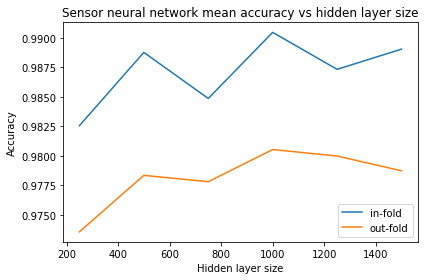

In [16]:
in_fold_hls_summary =  neural_network_results[(neural_network_results['solver'] == solver_opt) &
                                              (neural_network_results['activation'] == activation_opt) &
                                              (neural_network_results['alpha'] == alpha_opt)].groupby(['hidden_layer_size'])['in_fold_accuracy'].agg(['mean']).sort_values(by = ['hidden_layer_size'], ascending = True)
out_fold_hls_summary = neural_network_results[(neural_network_results['solver'] == solver_opt) &
                                              (neural_network_results['activation'] == activation_opt) &
                                              (neural_network_results['alpha'] == alpha_opt)].groupby(['hidden_layer_size'])['out_fold_accuracy'].agg(['mean']).sort_values(by = ['hidden_layer_size'], ascending = True)

fig, ax = plt.subplots()

ax.set_xlabel("Hidden layer size")
ax.set_ylabel("Accuracy")
ax.set_title("Sensor neural network mean accuracy vs hidden layer size")
ax.plot(hidden_layer_sizes,
        in_fold_hls_summary["mean"],
        label = "in-fold")
ax.plot(hidden_layer_sizes,
        out_fold_hls_summary["mean"],
        label = "out-fold")
ax.legend()

fig.tight_layout()

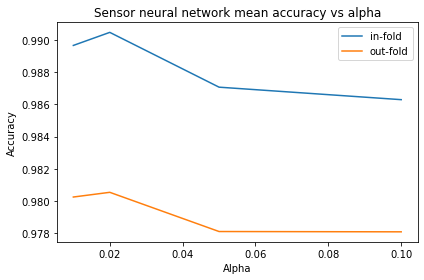

In [17]:
in_fold_alpha_summary = neural_network_results[(neural_network_results['solver'] == solver_opt) &
                                               (neural_network_results['activation'] == activation_opt) &
                                               (neural_network_results['hidden_layer_size'] == hidden_layer_size_opt)].groupby(['alpha'])['in_fold_accuracy'].agg(['mean']).sort_values(by = ['alpha'], ascending = True)
out_fold_alpha_summary = neural_network_results[(neural_network_results['solver'] == solver_opt) &
                                                (neural_network_results['activation'] == activation_opt) &
                                                (neural_network_results['hidden_layer_size'] == hidden_layer_size_opt)].groupby(['alpha'])['out_fold_accuracy'].agg(['mean']).sort_values(by = ['alpha'], ascending = True)


fig, ax = plt.subplots()

ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Sensor neural network mean accuracy vs alpha")
ax.plot(alphas,
        in_fold_alpha_summary["mean"],
        label = "in-fold")
ax.plot(alphas,
        out_fold_alpha_summary["mean"],
        label = "out-fold")
ax.legend()

fig.tight_layout()

### Function of training size

In [18]:
neural_network_train_sizes = []
neural_network_train_size_train_scores = []
neural_network_train_size_test_scores = []
neural_network_train_size_train_time = []
neural_network_train_size_score_time = []

iter_counter = 0
train_sizes = np.linspace(.05,.95, 19)
for train_size in train_sizes:
    (train_features_train_size, test_features_train_size,
    train_response_train_size, test_response_train_size) = train_test_split(data_all_features,
                                                                            data_all_response,
                                                                            train_size = train_size,
                                                                            random_state = 28)

    iter_counter = iter_counter + 1
    print("iter_counter:", iter_counter,
          "| train size:", train_size)
    neural_network_train_size = MLPClassifier(solver = solver_opt, #lbfgs, adam, sgd
                                              activation = activation_opt, #identity, logistic, tanh, relu
                                              alpha = alpha_opt,
                                              hidden_layer_sizes = (hidden_layer_size_opt,),
                                              batch_size = 'auto',
                                              learning_rate = 'constant',
                                              learning_rate_init = 0.001,
                                              power_t = 0.5,
                                              max_iter = 200,
                                              shuffle = True,
                                              random_state = 28,
                                              tol = 0.0001,
                                              verbose = False,
                                              warm_start = False,
                                              momentum = 0.9,
                                              nesterovs_momentum = True,
                                              early_stopping = True,
                                              validation_fraction = 0.1,
                                              beta_1 = 0.9,
                                              beta_2 = 0.999,
                                              epsilon = 1e-08,
                                              n_iter_no_change = 10,
                                              max_fun = 15000)
    
    start = time.time()
    neural_network_train_size.fit(train_features_train_size, train_response_train_size)
    end = time.time()
    neural_network_train_size_train_time.append(end - start)

    neural_network_train_sizes.append(neural_network_train_size)
    
    start = time.time()
    neural_network_train_size_train_scores.append(neural_network_train_size.score(train_features_train_size, train_response_train_size)) 
    end = time.time()
    neural_network_train_size_score_time.append(end - start)

    neural_network_train_size_test_scores.append(neural_network_train_size.score(test_features_train_size, test_response_train_size))

iter_counter: 1 | train size: 0.05
iter_counter: 2 | train size: 0.1
iter_counter: 3 | train size: 0.15
iter_counter: 4 | train size: 0.2
iter_counter: 5 | train size: 0.25
iter_counter: 6 | train size: 0.3
iter_counter: 7 | train size: 0.35
iter_counter: 8 | train size: 0.39999999999999997
iter_counter: 9 | train size: 0.44999999999999996
iter_counter: 10 | train size: 0.49999999999999994
iter_counter: 11 | train size: 0.5499999999999999
iter_counter: 12 | train size: 0.6
iter_counter: 13 | train size: 0.65
iter_counter: 14 | train size: 0.7
iter_counter: 15 | train size: 0.75
iter_counter: 16 | train size: 0.7999999999999999
iter_counter: 17 | train size: 0.85
iter_counter: 18 | train size: 0.9
iter_counter: 19 | train size: 0.95


### Plotting the learning curve by training size, for the optimal hyperparameters

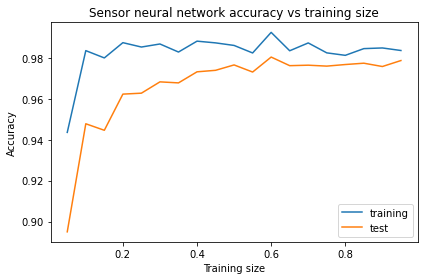

In [19]:
fig, ax = plt.subplots()

ax.set_xlabel("Training size")
ax.set_ylabel("Accuracy")
ax.set_title("Sensor neural network accuracy vs training size")
ax.plot(train_sizes, neural_network_train_size_train_scores, label = "training",
        #drawstyle = "steps-post"
       )
ax.plot(train_sizes, neural_network_train_size_test_scores, label = "test",
        #drawstyle = "steps-post"
       )
ax.legend()

fig.tight_layout()

###  Plotting the model fitting time as a function of the training size

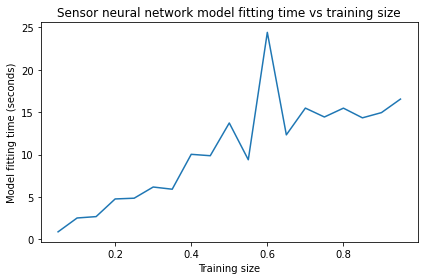

In [20]:
fig, ax = plt.subplots()

ax.set_xlabel("Training size")
ax.set_ylabel("Model fitting time (seconds)")
ax.set_title("Sensor neural network model fitting time vs training size")
ax.plot(train_sizes, neural_network_train_size_train_time, label = "training",
        #drawstyle = "steps-post"
       )

fig.tight_layout()

### Plotting the model scoring time as a function of the training size

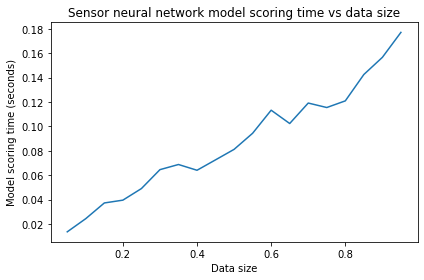

In [21]:
fig, ax = plt.subplots()

ax.set_xlabel("Data size")
ax.set_ylabel("Model scoring time (seconds)")
ax.set_title("Sensor neural network model scoring time vs data size")
ax.plot(train_sizes, neural_network_train_size_score_time, label = "training",
        #drawstyle = "steps-post"
       )

fig.tight_layout()